# Analysis of Sydney House Prices (2000-2019)

## Introduction  
This portfolio contains the analysis of the Sydney House Prices dataset. This dataset contains nearly 200,000 records of prorperty sales in Sydney from 2000 to 2019, taken from realestate.com.au

**Variables in this dataset:** Date, year, month, id, suburb, postalCode, sellPrice, bed, bath, car, propType  
* Date, year, month: date, year and month of purchase  
* id: id of each observation  
* suburb, postalCode: location of the property  
* sellPrice: price of the property  
* bed, bath: number of bedrooms and bathrooms in that property  
* car: number of cars the property can hold (if it has parking)
* propType: property type

**This portfolio will follow the following process, which includes:**
1. Identify the research question  
2. Explore, clean and prepare data: dealing with null values and outliers, visualisations   
3. Perform predictive modelling: predict property price and type  
and Model evaluation and analysis: comments on the models  

## 1. Purpose
The purpose of this portfolio is to find the best performing model in predicting property price and type from given variables, and find out which variables are best for predicting them. 

## 2. Data Exploration and Preperation

### Clean / Prepare

In [163]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [52]:
# load in the data
df = pd.read_csv("SydneyHousePrice.csv")

df.head()

,Date,year,month,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,6/19/2019,2019,6,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,6/13/2019,2019,6,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,6/7/2019,2019,6,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,5/28/2019,2019,5,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,5/22/2019,2019,5,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [53]:
# Check the structure of the dataset, number of variables, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   year        199504 non-null  int64  
 2   month       199504 non-null  int64  
 3   Id          199504 non-null  int64  
 4   suburb      199504 non-null  object 
 5   postalCode  199504 non-null  int64  
 6   sellPrice   199504 non-null  int64  
 7   bed         199350 non-null  float64
 8   bath        199504 non-null  int64  
 9   car         181353 non-null  float64
 10  propType    199504 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 16.7+ MB


#### Dealing with null values

In [54]:
# Checking if there is any null values
df.isnull().sum()

Date              0
year              0
month             0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

In [57]:
# drop null values from bed
df = df.dropna(subset=['bed'])

# assume that null values from car is for properties with no parking spaces -> fill with 0
df = df.fillna(value=0)

# check dataframe
df.shape

(199350, 11)

In [58]:
df.isnull().sum()

Date          0
year          0
month         0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64

In [59]:
df.describe()

,year,month,Id,postalCode,sellPrice,bed,bath,car
count,199350.000000,199350.000000,199350.000000,199350.000000,1.993500e+05,199350.000000,199350.000000,199350.000000
mean,2014.595445,6.778385,99746.475992,2196.404886,1.270021e+06,3.516479,1.890489,1.760356
std,2.883209,3.288408,57593.608005,193.069506,6.950861e+06,1.066555,0.900049,1.150282
min,2000.000000,1.000000,1.000000,2000.000000,1.000000e+00,1.000000,1.000000,0.000000
25%,2013.000000,4.000000,49868.250000,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,2015.000000,7.000000,99741.500000,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,2017.000000,10.000000,149625.750000,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,2019.000000,12.000000,199504.000000,4878.000000,2.147484e+09,99.000000,60.000000,31.000000


#### Detect and remove outliers   
The variables I will look at are: **bed, bath, car and sellPrice.**  

Outliers for bed, bath and car will be detected by counts and removed based on a threshold. Boxplot will be used to plot distribution and outliers of sellPrice.

**bed**

In [88]:
print(df['bed'].value_counts())

3.0     83066
4.0     63348
2.0     23109
5.0     22987
6.0      4129
1.0      1383
7.0       763
8.0       276
9.0       103
10.0       64
12.0       35
11.0       18
13.0       10
14.0        9
20.0        8
16.0        8
15.0        8
30.0        5
19.0        3
18.0        3
23.0        3
17.0        3
24.0        2
26.0        1
36.0        1
99.0        1
22.0        1
45.0        1
21.0        1
34.0        1
Name: bed, dtype: int64


In [89]:
# remove outliers - threshold: 13  
# any place with more than 13 bedrooms will be removed
outlier = df[(df['bed'] > 13)]

# create a list of Id of places with > 13 bedrooms
outlierId = outlier.Id.tolist()

# drop outliers
df1 = df[~(df.Id.isin(outlierId))]
print(df1['bed'].value_counts())

3.0     83066
4.0     63348
2.0     23109
5.0     22987
6.0      4129
1.0      1383
7.0       763
8.0       276
9.0       103
10.0       64
12.0       35
11.0       18
13.0       10
Name: bed, dtype: int64


**bath**

In [90]:
print(df1['bath'].value_counts())

2     86462
1     73012
3     31838
4      6020
5      1399
6       381
7       106
8        37
10       17
9         6
12        6
11        5
14        2
Name: bath, dtype: int64


In [91]:
# remove outliers from bath - threshold: count < 12
outlier = df1[(df1['bath'] > 10) | (df1['bath'] == 9)]

# create a list of Id of places with counts of values < 12
outlierId = outlier.Id.tolist()

# drop outliers
df2 = df1[~(df1.Id.isin(outlierId))]
print(df2['bath'].value_counts()) 

2     86462
1     73012
3     31838
4      6020
5      1399
6       381
7       106
8        37
10       17
Name: bath, dtype: int64


**car**

In [92]:
print(df2['car'].value_counts())

2.0     91013
1.0     61847
0.0     18062
3.0     15566
4.0      8888
5.0      1692
6.0      1289
8.0       297
7.0       272
10.0      140
9.0        80
12.0       45
11.0       19
15.0       17
13.0       13
14.0       10
16.0        7
20.0        7
30.0        2
17.0        2
22.0        1
29.0        1
21.0        1
31.0        1
Name: car, dtype: int64


In [93]:
# remove outliers from car - threshold: 10 cars
outlier = df2[(df2['car'] > 10)]

# create a list of Id of places with parking spaces for > 10 cars
outlierId = outlier.Id.tolist()

# drop outliers
df3 = df2[~(df2.Id.isin(outlierId))]
print(df3['car'].value_counts())

2.0     91013
1.0     61847
0.0     18062
3.0     15566
4.0      8888
5.0      1692
6.0      1289
8.0       297
7.0       272
10.0      140
9.0        80
Name: car, dtype: int64


**sellPrice**

<Axes: xlabel='sellPrice'>

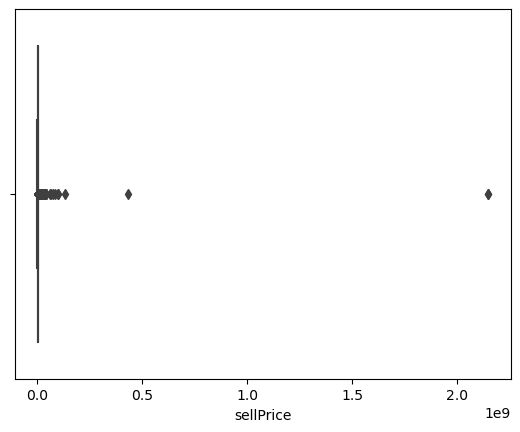

In [94]:
# boxplot to see outliers
sns.boxplot(data=df3, x='sellPrice')

There are quite a lot of outliers, so I remove sellPrice that are more than ~596,000 (0.2e8)

<Axes: xlabel='sellPrice'>

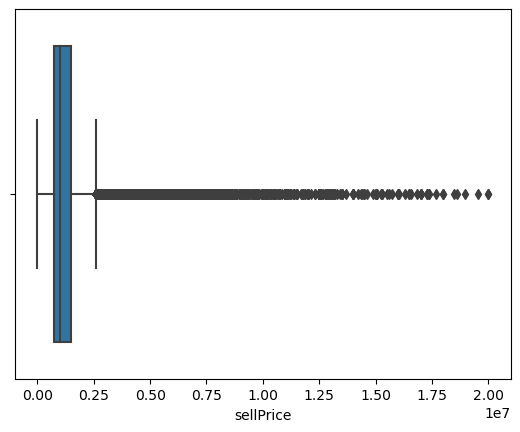

In [161]:
# choose rows with sellPrice > 0.2e8
outlier = df3[(df3.sellPrice > 0.2e8)]

# create a list of Id with selling price > 0.2e9
outlierId = outlier.Id.tolist()

# drop outliers
df4 = df3[~(df3.Id.isin(outlierId))]

# plot sellPrice again
#plt.figure(figsize=(15,6))
sns.boxplot(data=df4, x='sellPrice')

In [162]:
# check the remaining values
print(df4.shape)

(199118, 11)


### Explore

<Axes: title={'center': 'Number of properties sold for each type'}, xlabel='Property Type', ylabel='Counts'>

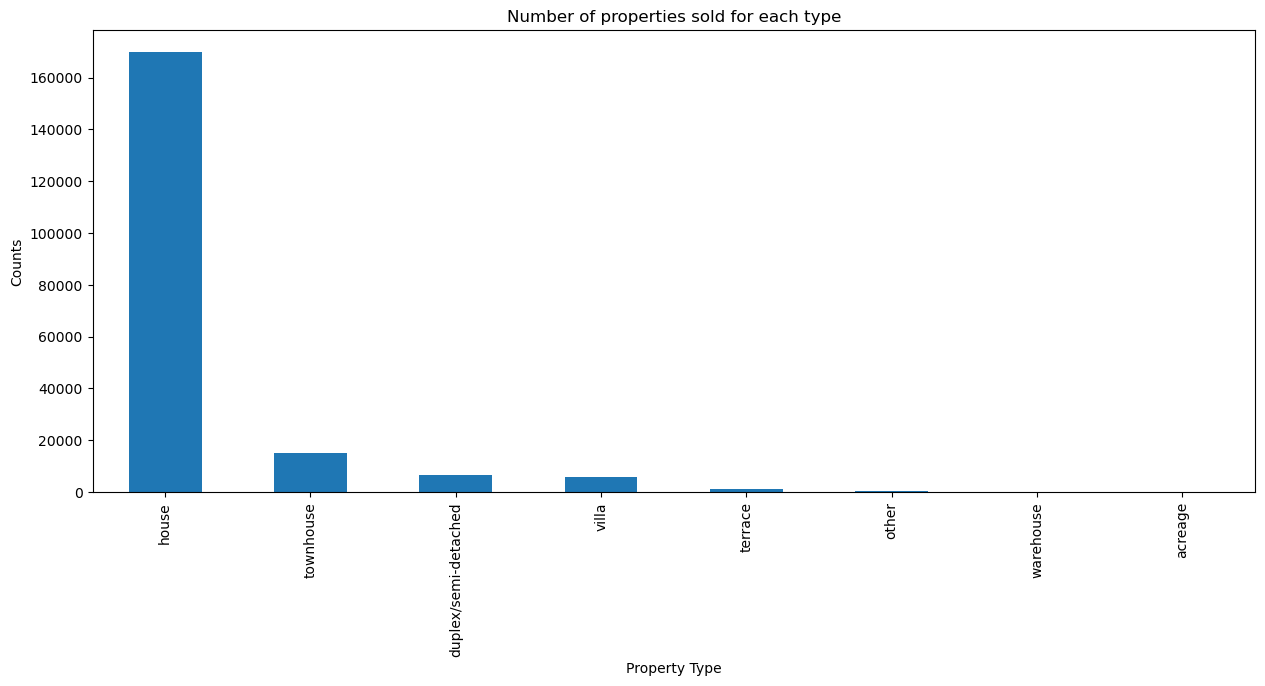

In [110]:
# plot for properties sold for each property type
plt.figure(figsize=(15,6))
df4.propType.value_counts().plot.bar(title='Number of properties sold for each type', xlabel='Property Type', ylabel='Counts')

House is the most popular property type, with more than 160,000 properties sold. This is followed by townhouse, duplex/semidetached, villa, and 4 other types.

Text(0.5, 1.0, 'Number of Properties Sold by Year')

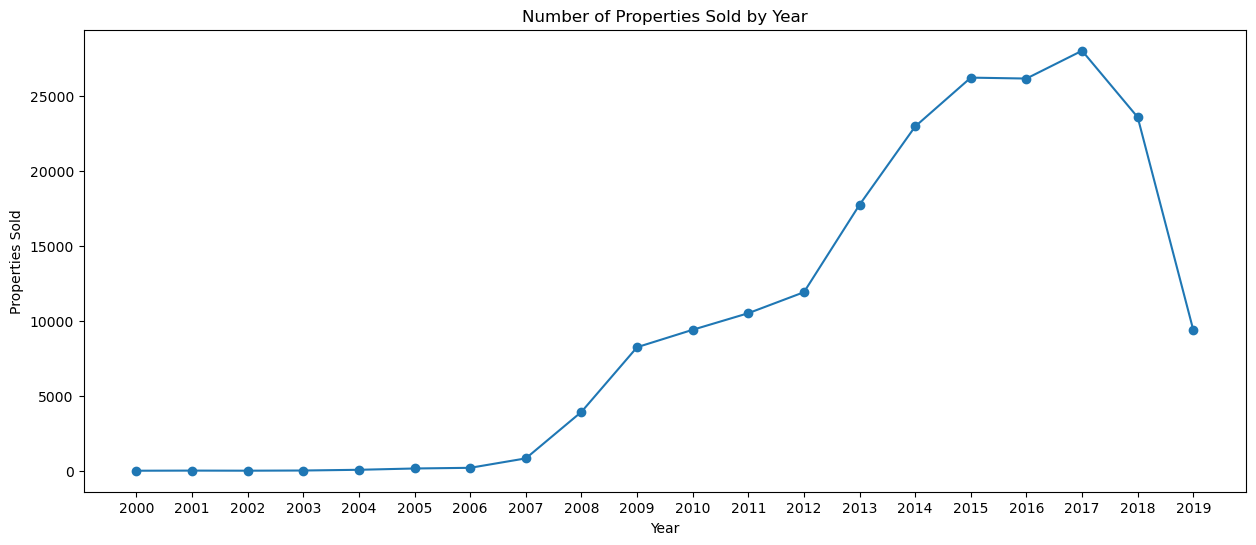

In [87]:
# plot for properties sold in each year
ysales = df4.groupby('year')['Id'].count()

plt.figure(figsize=(15,6))
plt.plot(ysales.index, ysales.values, marker='o')
plt.xticks(ysales.index)
plt.xlabel("Year")
plt.ylabel("Properties Sold")
plt.title("Number of Properties Sold by Year")

The number of properties sold increases over the year from 2000 to 2017, which had the highest sales. However, the number decreased sharply from 2017 to 2019. From 2012 onwards, there are 100,000 or more properties sold each year. 

## 3. Predictive Modelling for House Prices  
**Methods used:** Linear Regression and Polynomial Regression.  
**The steps are:**  
- Encode categorical variable  
- Perform linear regression: on all variables and after feature selection  
- Compare 2 models together  

In [140]:
# remove redundant columns
cleandf = df4.drop(['Id','Date'], axis='columns')

cleandf.head()

,year,month,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019,6,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019,6,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019,6,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019,5,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [119]:
# encode variables
cleandf["suburb"] = LabelEncoder().fit_transform(cleandf["suburb"])
cleandf["propType"] = LabelEncoder().fit_transform(cleandf["propType"])
cleandf["postalCode"] = LabelEncoder().fit_transform(cleandf["postalCode"])

cleandf.head()

,year,month,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019,6,22,86,1210000,4.0,2,2.0,2
1,2019,6,22,86,2250000,4.0,3,4.0,2
2,2019,6,653,86,2920000,3.0,3,2.0,2
3,2019,5,22,86,1530000,3.0,1,2.0,2
4,2019,5,653,86,8000000,5.0,4,4.0,2


### Linear Regression

<Axes: >

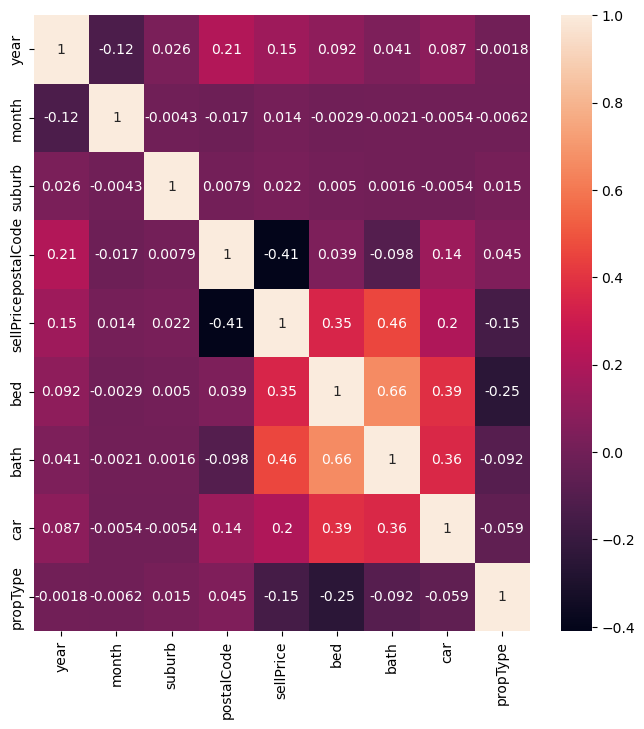

In [118]:
# check correlations
plt.figure(figsize=(8,8))
sns.heatmap(cleandf.corr(), annot=True)

The variables seem to have low correlation with each other. The highest correlation is between *bed* and *bath*. We are interested in predicting *sellPrice* from other variables, so when looking at *sellPrice*, we can see that *postalCode, bed, bath and car* have higher correlations with *sellPrice* compared to other variables. *Suburb* and *month* seem to have the lowest correlations.

**Train and test split with all variables**

In [120]:
# split data into training(80%) and testing data (20%) 
train, test = train_test_split(cleandf, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(159294, 9)
(39824, 9)


In [121]:
# linear regression object
reg = linear_model.LinearRegression()

# assign variables for X & y in train & test data
X_train_all = train.drop(['sellPrice'], axis=1)
y_train_all = train['sellPrice']
X_test_all = test.drop(['sellPrice'], axis=1)
y_test_all = test['sellPrice']

# fit model on train data
reg.fit(X_train_all, y_train_all)

LinearRegression()

In [122]:
# predict y on test data 
y_pred = reg.predict(X_test_all)

# evaluation metrics
mse = ((np.array(y_test_all)-y_pred)**2).sum()/len(y_test_all)
mae = mean_absolute_error(y_test_all, y_pred)
r2 = r2_score(y_test_all, y_pred)

print("MSE:", mse)
print("Root MSE", np.sqrt(mse))
print("MAE", mae)
print("R Squared:", r2)

MSE: 477404941316.89874
Root MSE 690944.9625816073
MAE 417589.42634530284
R Squared: 0.40983919452775663


**Feature selection**

In [123]:
# create RFE object
rfe = RFE(estimator=reg, n_features_to_select=5, step=1)
rfe.fit(X_train_all, y_train_all)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [124]:
# summarise all features
for i in range(X_train_all.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i])) 

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected False, Rank: 4.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000


=> Choose the following variables: **year, bed, bath, car, propType**

In [125]:
# based on RFE
X_train = train.drop(['sellPrice', 'month', 'suburb'], axis=1)
y_train = train['sellPrice']
X_test = test.drop(['sellPrice', 'month', 'suburb'], axis=1)
y_test = test['sellPrice']

# fit model on train data
reg.fit(X_train, y_train)

LinearRegression()

In [126]:
# predict y on test data
y_test_pred = reg.predict(X_test)

# evaluation metrics
mse = ((np.array(y_test)-y_test_pred)**2).sum()/len(y_test)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("MSE:", mse)
print("Root MSE", np.sqrt(mse))
print("MAE", mae)
print("R Squared:", r2)

MSE: 478608306742.95166
Root MSE 691815.2258681156
MAE 418015.4191881533
R Squared: 0.4083516122937776


### Polynomial Regression

In [138]:
# polynomial regression object with degree = 4 
poly = PolynomialFeatures(degree=4)

# fit X_train, with all variables
X_train_poly = poly.fit_transform(X_train_all)
reg.fit(X_train_poly, y_train_all)

LinearRegression()

In [139]:
# test 
X_test_poly = poly.transform(X_test_all)
y_pred_poly = reg.predict(X_test_poly)

mse = ((np.array(y_test_all)-y_pred_poly)**2).sum()/len(y_test_all)
mae = mean_absolute_error(y_test_all, y_pred_poly)
r2 = r2_score(y_test_all, y_pred_poly)
print("MSE:", mse)
print("Root MSE", np.sqrt(mse))
print("MAE", mae)
print("R Squared:", r2)

MSE: 383152487797.4446
Root MSE 618993.1241923812
MAE 350450.25596961344
R Squared: 0.5263526594561669


### Comment  
- MSE, RMSE and MAE suggest the differences between predicted and actual values. These 3 metrics are all high across 3 models (Linear Regression with and without feature selection, Polynomial Regression)  
- R^2 shows the proportion of variation that the models explain. The numbers are pretty low across 3 models (40.98%, 40.83%, 52.64%)  
- Overall, Polynomial Regression has the best performance out of the 3, but these 3 models still have pretty poor performance.
- Linear Regression model with feature selection has worse performance compared to Linear Regression without feature selection.

## 3. Prediction for Property Type  
**Method used:** Logistic Regression, KNN  
Predict the type of a property based on the location, price and number of rooms/parking spaces  

### Logistic Regression  

In [142]:
X_train_log = train.drop(['propType', 'year', 'month'], axis = 1)
y_train_log = train['propType']

X_test_log = test.drop(['propType', 'year', 'month'], axis = 1)
y_test_log = test['propType']

model = LogisticRegression()
model.fit(X_train_log, y_train_log)

LogisticRegression()

In [143]:
# prediction 
fitted_y_train = model.predict(X_train_log)
fitted_y_test = model.predict(X_test_log)

In [160]:
# evaluate the performance 
print("Accuracy score on training set: ", accuracy_score(y_train_log, fitted_y_train))
print("Accuracy score on testing set: ", accuracy_score(y_test_log, fitted_y_test))

Accuracy score on training set:  0.8542945748113551
Accuracy score on testing set:  0.847001807955002


In [164]:
# feature selection
rfe = RFE(estimator = model, n_features_to_select = 3, step = 1)
rfe.fit(X_train_log, y_train_log)

# evaluation on feature selection
fitted_y_test = rfe.predict(X_test_log)

In [147]:
# summarise all features
for i in range(X_train_log.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 2.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected False, Rank: 3.000


In [148]:
# fit model on train dataset - with feature selection
X_train_log_fs = train[['postalCode', 'bed', 'suburb']]
y_train_log_fs = train['propType']

X_test_log_fs = test[['postalCode', 'bed', 'suburb']]
y_test_log_fs = test['propType']

model = LogisticRegression()
model.fit(X_train_log_fs, y_train_log_fs)

LogisticRegression()

In [149]:
# prediction - with feature selection
fitted_y_train_fs = model.predict(X_train_log_fs)
fitted_y_test_fs = model.predict(X_test_log_fs)

In [150]:
# evaluation of model - with feature selection
print("Accuracy score on training set: ", accuracy_score(y_train_log_fs, fitted_y_train_fs))
print("Accuracy score on testing set: ", accuracy_score(y_test_log_fs, fitted_y_test_fs))

Accuracy score on training set:  0.8539241904905395
Accuracy score on testing set:  0.8468762555243069


### KNN

In [151]:
# fit model with K = 3
X_train = train.drop(['propType', 'year', 'month'], axis = 1)
y_train = train['propType']

X_test = test.drop(['propType', 'year', 'month'], axis = 1)
y_test = test['propType']

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [153]:
# prediction 
y_hat_train = knn_model.predict(X_train)
y_hat_test = knn_model.predict(X_test)

In [154]:
# evaluation
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.884446369605886
Accuracy score on testing set:  0.8180996384089996


In [155]:
# tune K
grid_search = GridSearchCV(knn_model, param_grid = {'n_neighbors': range(5, 51, 1)}, cv=5) #5 to 50 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(5, 51)})

In [156]:
# best K
print("Best K: ", grid_search.best_params_)

# fit new KNN model with K = 45
new_knn_model = KNeighborsClassifier(n_neighbors=45)
new_knn_model.fit(X_train, y_train)

# prediction
y_hat_train = new_knn_model.predict(X_train)
y_hat_test = new_knn_model.predict(X_test)

# evaluation
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Best K:  {'n_neighbors': 45}
Accuracy score on training set:  0.854395018017
Accuracy score on testing set:  0.8474789071916432


### Comment  
The performances of Logistic Regression and KNN model are both high. However, there is not much difference in accuracy scores between the 2 models, in fact they are almost identical. This can be due to the fact that House is the most popular type, with more than 160,000 properties sold compared to the second highest type (Townhouse) with only 20,000 properties sold. 